In [1]:
# Load librairies

import os

import pandas as pd
import numpy as np
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix as pcm

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation


import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Shows matplotlib output inline in the Jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline
sns.color_palette("vlag", as_cmap=True)

In [3]:
# Load data
print(os.listdir(path = r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D213\New folder"))

['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']


In [4]:
# Load UCI Sentiment Labeled Sentences Data Set
df_amz = pd.read_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D213\New folder\amazon_cells_labelled.txt", delimiter='\t',header=None)
df_amz.columns = ['review','sentiment']

In [5]:
# View dimensions of data
print('Dimensions of Amazon data: ', df_amz.shape)

Dimensions of Amazon data:  (1000, 2)


In [6]:
# View stats of data sets
print('Stats of Amazon data: ', df_amz.describe())

Stats of Amazon data:          sentiment
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000


In [7]:
# Check for special characters
pd.set_option('display.max_colwidth', 5000)
df_amz.head(10)

,review,sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


<AxesSubplot:xlabel='sentiment', ylabel='count'>

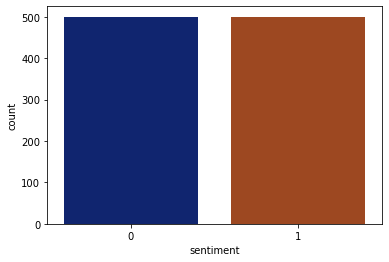

In [8]:
#Distribution of the Amazon data
sns.countplot(data=df_amz, x='sentiment', palette='dark')

In [9]:
# Convert sentiment ratings to integer
df_amz['sentiment'] = df_amz['sentiment'].astype(int)

In [10]:
# drop nulls
df_amz = df_amz.dropna()

In [11]:
print('Amazon: ', df_amz.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 19.5+ KB
Amazon:  None


In [12]:
df_amz.head()

,review,sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


In [13]:
# Check for unusual characters
reviews = df_amz['review']
list_of_characters = []
for comment in reviews:
    for character in comment:
        if character not in list_of_characters:
            list_of_characters.append(character)
print(list_of_characters)

['S', 'o', ' ', 't', 'h', 'e', 'r', 'i', 's', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'U', 'I', 'b', 'c', 'v', '.', 'G', 'd', ',', 'E', 'x', 'j', 'T', '4', '5', 'M', 'A', 'J', 'O', 'R', 'P', 'B', 'L', '!', 'z', 'N', 'W', 'q', 'H', '+', 'V', '"', 'Y', 'D', 'F', 'k', "'", 'K', 'C', '/', '7', '3', '6', '8', '0', '2', '?', 'Z', '-', '1', ':', ')', '(', 'Q', '&', '$', '*', ';', 'X', '%', '9', '#', '[', ']']


In [14]:
#Remove special characters
def remove_punctuation(text):
    final ="".join(u for u in text if u not in("?","'",".",":",";","!",'+','"','/','-','&','$','*','%','#','[',']','0','1','2','3','4','5','6','7','8','9','\n', ',', '(',')'))
    return final
df_amz['review'] = df_amz['review'].apply(remove_punctuation)

In [15]:
# Check for special characters that were missed the first time
reviews = df_amz['review']
list_of_characters = []
for comment in reviews:
    for character in comment:
        if character not in list_of_characters:
            list_of_characters.append(character)
print(list_of_characters)

['S', 'o', ' ', 't', 'h', 'e', 'r', 'i', 's', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'U', 'I', 'b', 'c', 'v', 'G', 'd', 'E', 'x', 'j', 'T', 'M', 'A', 'J', 'O', 'R', 'P', 'B', 'L', 'z', 'N', 'W', 'q', 'H', 'V', 'Y', 'D', 'F', 'k', 'K', 'C', 'Z', 'Q', 'X']


In [16]:
df_amz.head()

,review,sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter,0
1,Good case Excellent value,1
2,Great for the jawbone,1
3,Tied to charger for conversations lasting more than minutesMAJOR PROBLEMS,0
4,The mic is great,1


In [17]:
# Tokenize and convert characters to lower case
keras_token = Tokenizer(oov_token='[UNK]', lower=True)

# Call fit_on_texts to fit a dictionary of comments based on frequency
keras_token.fit_on_texts(reviews)

# Create dictionary variable
word_count = keras_token.word_index
print('Vocabulary size: ', len(word_count))

# Print sample of word counts
list(word_count.items())[950:975]

Vocabulary size:  1857


[('file', 951),
 ('browser', 952),
 ('offers', 953),
 ('options', 954),
 ('needshandsfree', 955),
 ('bluetoothmotorola', 956),
 ('hs', 957),
 ('whether', 958),
 ('latest', 959),
 ('os', 960),
 ('vg', 961),
 ('likes', 962),
 ('crawl', 963),
 ('recognizes', 964),
 ('bluetoooth', 965),
 ('thorn', 966),
 ('abhor', 967),
 ('recently', 968),
 ('disconnected', 969),
 ('bucks', 970),
 ('check', 971),
 ('mail', 972),
 ('night', 973),
 ('backlight', 974),
 ('message', 975)]

In [18]:
print(keras_token.word_index)

{'[UNK]': 1, 'the': 2, 'i': 3, 'and': 4, 'it': 5, 'is': 6, 'a': 7, 'this': 8, 'to': 9, 'phone': 10, 'my': 11, 'for': 12, 'of': 13, 'not': 14, 'with': 15, 'very': 16, 'great': 17, 'was': 18, 'on': 19, 'in': 20, 'that': 21, 'good': 22, 'have': 23, 'you': 24, 'product': 25, 'quality': 26, 'had': 27, 'headset': 28, 'works': 29, 'but': 30, 'battery': 31, 'as': 32, 'its': 33, 'so': 34, 'are': 35, 'sound': 36, 'all': 37, 'use': 38, 'one': 39, 'well': 40, 'ear': 41, 'has': 42, 'would': 43, 'work': 44, 'from': 45, 'your': 46, 'dont': 47, 'like': 48, 'case': 49, 'if': 50, 'me': 51, 'than': 52, 'be': 53, 'ive': 54, 'excellent': 55, 'time': 56, 'after': 57, 'price': 58, 'no': 59, 'up': 60, 'recommend': 61, 'does': 62, 'really': 63, 'at': 64, 'im': 65, 'or': 66, 'best': 67, 'service': 68, 'get': 69, 'when': 70, 'out': 71, 'nice': 72, 'only': 73, 'also': 74, 'too': 75, 'just': 76, 'any': 77, 'new': 78, 'love': 79, 'these': 80, 'worked': 81, 'am': 82, 'charger': 83, 'more': 84, 'money': 85, 'do': 86,

In [19]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [20]:
negative = df_amz[df_amz['sentiment'] == 0]
positive = df_amz[df_amz['sentiment'] == 1]

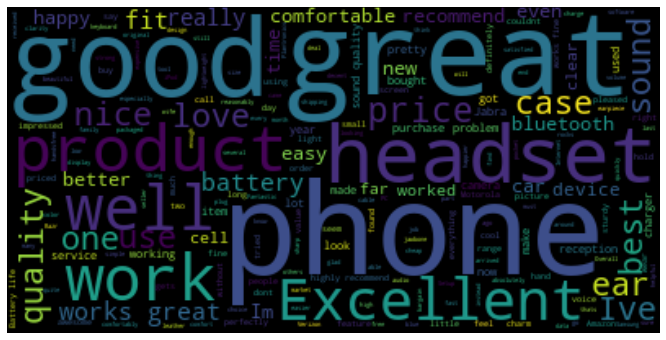

In [21]:
# Generate word cloud to visualize most frequently used words for positive reviews
stopwords = set(STOPWORDS)
plt.figure(figsize=(12, 6))
stopwords.update(["br", "href"])
pos = " ".join(review for review in positive.review)
wordcloud = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

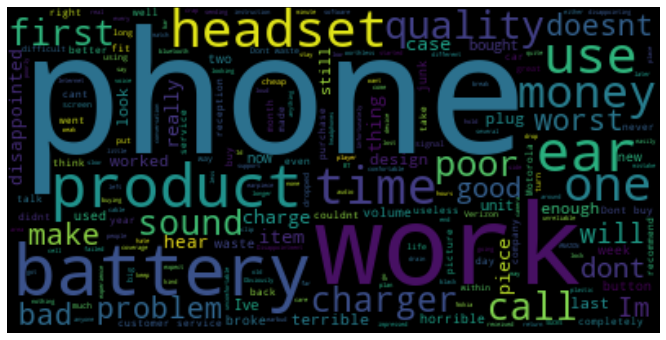

In [22]:
# Generate word cloud to visualize most frequently used words for negative reviews
stopwords = set(STOPWORDS)
plt.figure(figsize=(12, 6))
stopwords.update(["br", "href"])
neg = " ".join(review for review in negative.review)
wordcloud = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [23]:
# Find vocabulary size
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_amz['review'])
vocab_size=len(tokenizer.word_index) + 1
print("Vocabulary size: ", vocab_size)

Vocabulary size:  1857


In [24]:
# Word embedding length
max_sequence_embedding = int(round(np.sqrt(np.sqrt(vocab_size)), 0))
max_sequence_embedding

7

In [25]:
review_length = []
for char_len in reviews:
    review_length.append(len(char_len.split(' ')))

review_max = np.max(review_length)
review_min = np.min(review_length)
review_median = np.median(review_length)
print('The max sequence length would be: ', review_max)
print('The min sequence length would be: ', review_min)
print('The median sequence length would be: ', review_median)

The max sequence length would be:  30
The min sequence length would be:  1
The median sequence length would be:  9.0


In [26]:
# Set the dimensions
oov_tok = "<OOV>"
embedding_dim = 7
max_length = 30
trunc_type='post'
padding_type='post'

In [27]:
# Split the data into 80/20 train/test sets
X = df_amz['review']
y = df_amz['sentiment']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=7)
tokenizer.fit_on_texts(X_train)
vocab_size      = len(tokenizer.word_index)+1
word_index      = tokenizer.word_index
# Padding to improve performance
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [28]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
print(word_index)

{'the': 1, 'i': 2, 'and': 3, 'it': 4, 'is': 5, 'a': 6, 'this': 7, 'to': 8, 'phone': 9, 'my': 10, 'for': 11, 'of': 12, 'not': 13, 'with': 14, 'very': 15, 'great': 16, 'was': 17, 'in': 18, 'on': 19, 'good': 20, 'that': 21, 'have': 22, 'you': 23, 'product': 24, 'quality': 25, 'headset': 26, 'had': 27, 'works': 28, 'its': 29, 'so': 30, 'but': 31, 'battery': 32, 'all': 33, 'are': 34, 'as': 35, 'use': 36, 'sound': 37, 'one': 38, 'well': 39, 'would': 40, 'ear': 41, 'has': 42, 'work': 43, 'from': 44, 'your': 45, 'dont': 46, 'like': 47, 'if': 48, 'case': 49, 'than': 50, 'be': 51, 'price': 52, 'excellent': 53, 'time': 54, 'no': 55, 'after': 56, 'really': 57, 'me': 58, 'recommend': 59, 'ive': 60, 'does': 61, 'im': 62, 'at': 63, 'up': 64, 'nice': 65, 'or': 66, 'when': 67, 'best': 68, 'out': 69, 'service': 70, 'get': 71, 'new': 72, 'only': 73, 'too': 74, 'am': 75, 'love': 76, 'worked': 77, 'also': 78, 'more': 79, 'do': 80, 'money': 81, 'an': 82, 'can': 83, 'buy': 84, 'even': 85, 'these': 86, 'item'

In [39]:
# Set hyperparemeters
activation = 'softmax'
loss = 'categorical_crossentropy'
optimizer = 'adam'

num_epochs = 8

#Define Early Stopping Monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create model
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation=activation)
])

#Fit the model
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [40]:
prediction = model.predict(test_padded)

7/7 [==============================] - 0s 941us/step


In [41]:
pd.DataFrame(train_padded).to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D213\training_padded.csv")
pd.DataFrame(train_sequences).to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D213\training_label.csv")
pd.DataFrame(test_padded).to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D213\testing_padded.csv")
pd.DataFrame(test_sequences).to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D213\testing_label.csv")

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 7)             12999     
                                                                 
 global_average_pooling1d_1   (None, 7)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 100)               800       
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 2)                 102       
                                                                 
Total params: 18,951
Trainable params: 18,951
Non-trainable params: 0
__________________________________________________

In [43]:
history = model.fit(test_padded, prediction,batch_size=30, epochs=num_epochs, 
                    validation_split=0.3, callbacks=[early_stopping_monitor], verbose=True)

Epoch 1/8
5/5 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 1.0000 - val_loss: 0.6931 - val_accuracy: 0.3667
Epoch 2/8
5/5 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.6857 - val_loss: 0.6931 - val_accuracy: 1.0000
Epoch 3/8
5/5 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.9429 - val_loss: 0.6931 - val_accuracy: 0.9833
Epoch 4/8
5/5 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.9786 - val_loss: 0.6931 - val_accuracy: 1.0000
Epoch 5/8
5/5 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.9571 - val_loss: 0.6931 - val_accuracy: 1.0000
Epoch 6/8
5/5 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.9929 - val_loss: 0.6931 - val_accuracy: 0.9833


In [44]:
history.history

{'loss': [0.6931463479995728,
  0.6931465864181519,
  0.6931459307670593,
  0.693145751953125,
  0.6931456923484802,
  0.6931456327438354],
 'accuracy': [1.0,
  0.6857143044471741,
  0.9428571462631226,
  0.9785714149475098,
  0.9571428298950195,
  0.9928571581840515],
 'val_loss': [0.6931473016738892,
  0.6931461095809937,
  0.6931456327438354,
  0.6931455135345459,
  0.6931455135345459,
  0.6931455135345459],
 'val_accuracy': [0.36666667461395264,
  1.0,
  0.9833333492279053,
  1.0,
  1.0,
  0.9833333492279053]}

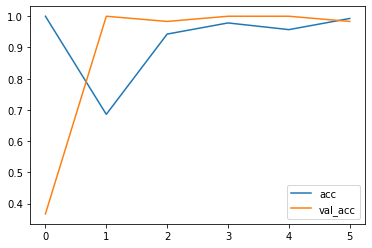

<Figure size 432x288 with 0 Axes>

In [45]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

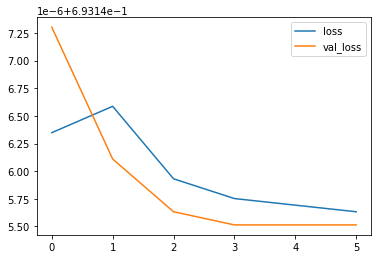

<Figure size 432x288 with 0 Axes>

In [46]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [52]:
score = model.evaluate(test_padded, prediction, verbose=True)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

7/7 [==============================] - 0s 831us/step - loss: 0.6931 - accuracy: 0.9500
Test loss: 0.6931456923484802 / Test accuracy: 0.949999988079071


In [ ]:
# Save the trained NN
model.save('Reviews_NN.h5')